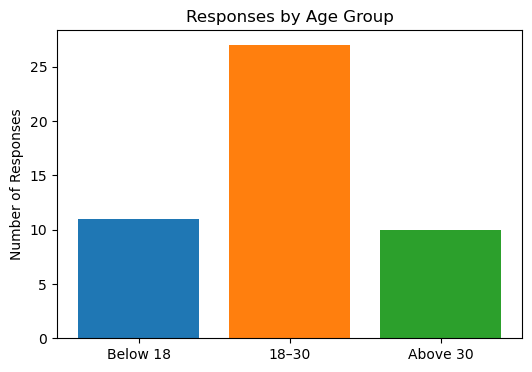

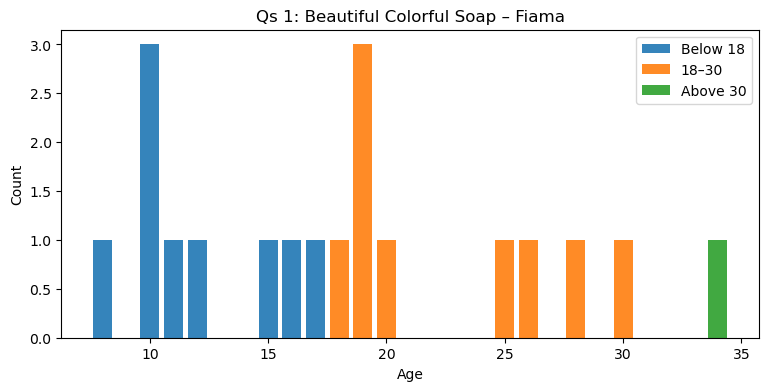

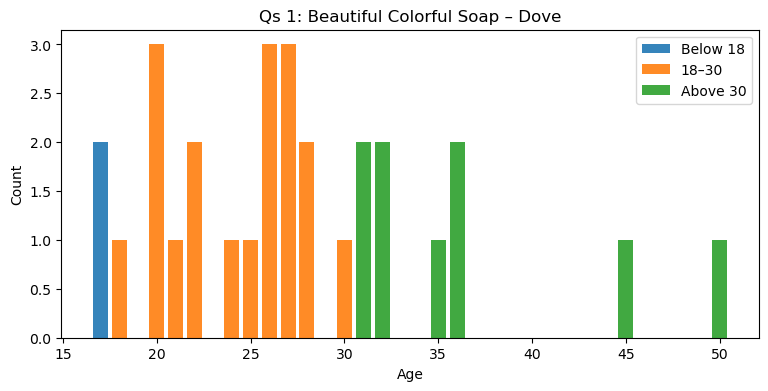

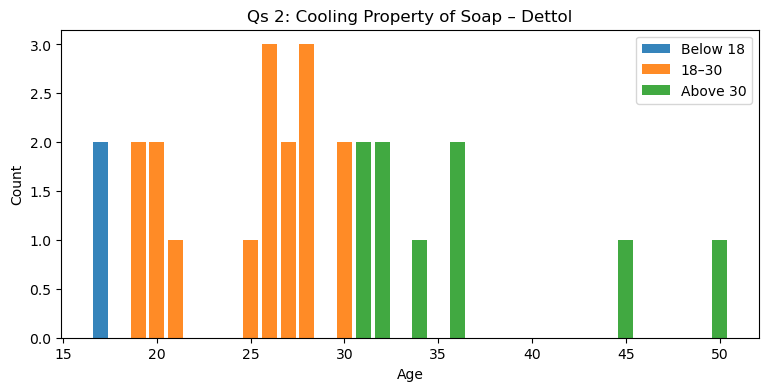

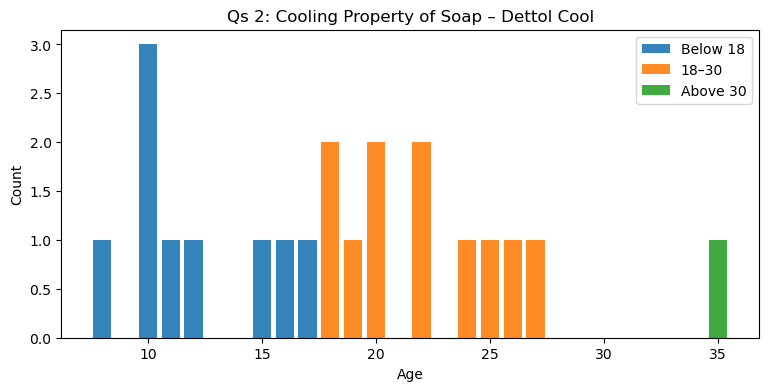

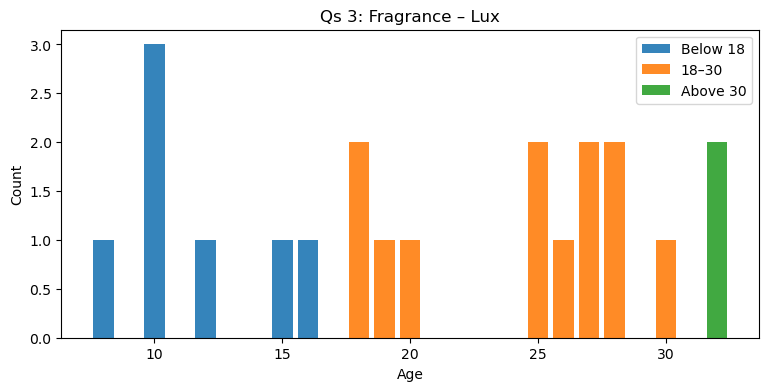

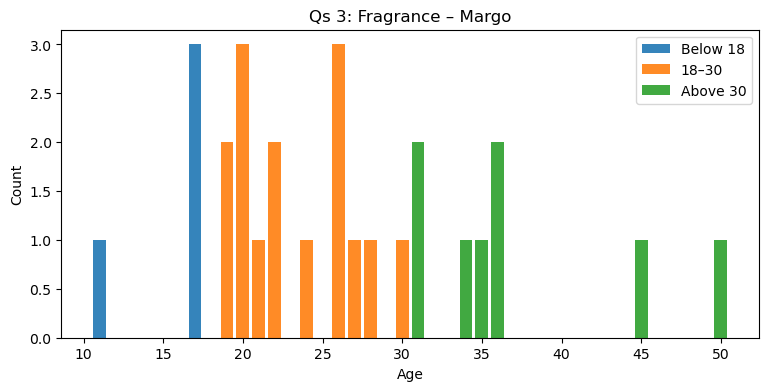

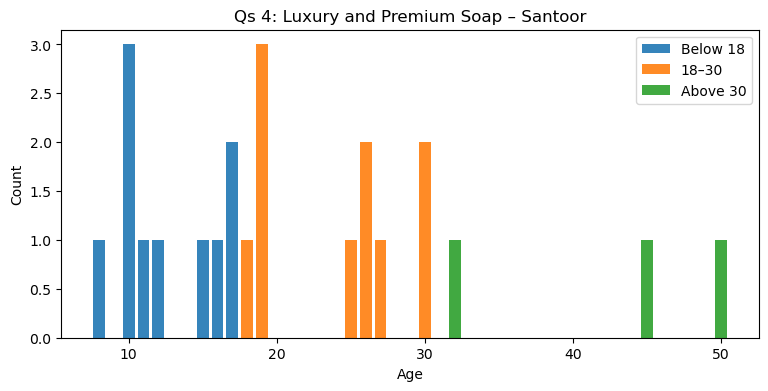

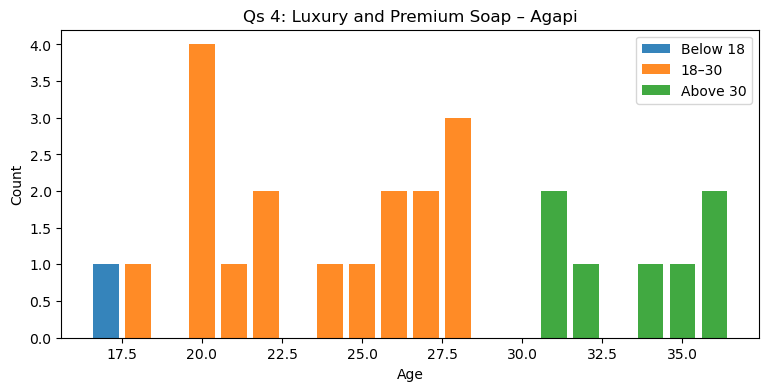

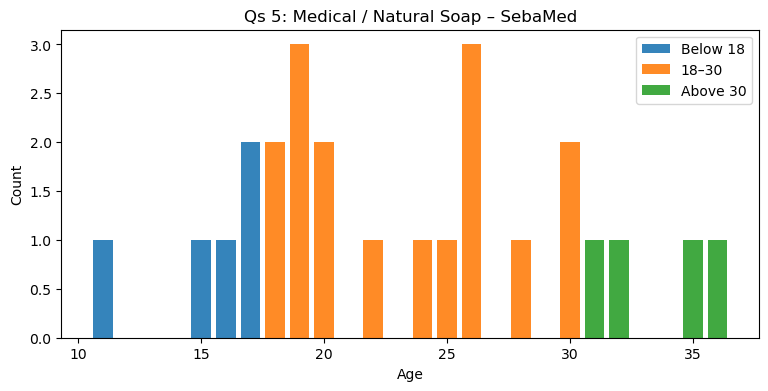

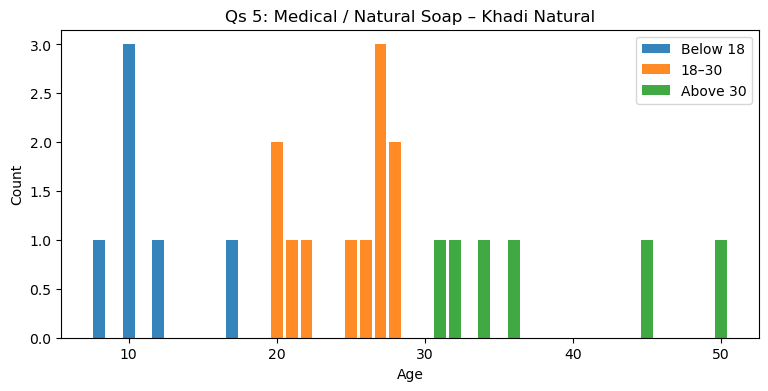

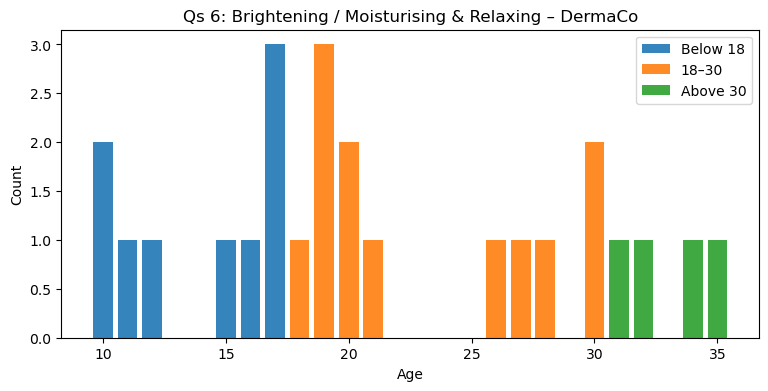

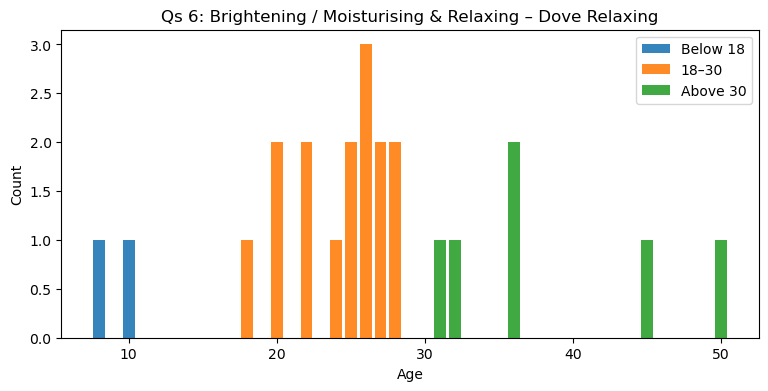

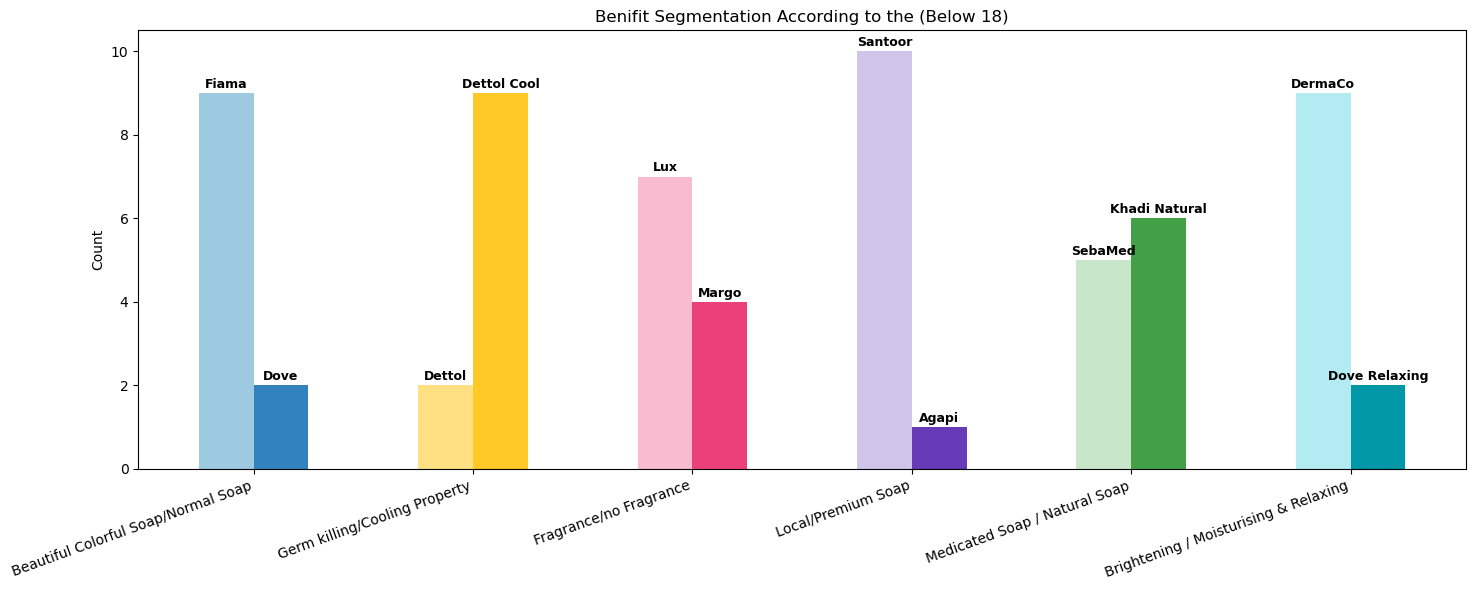

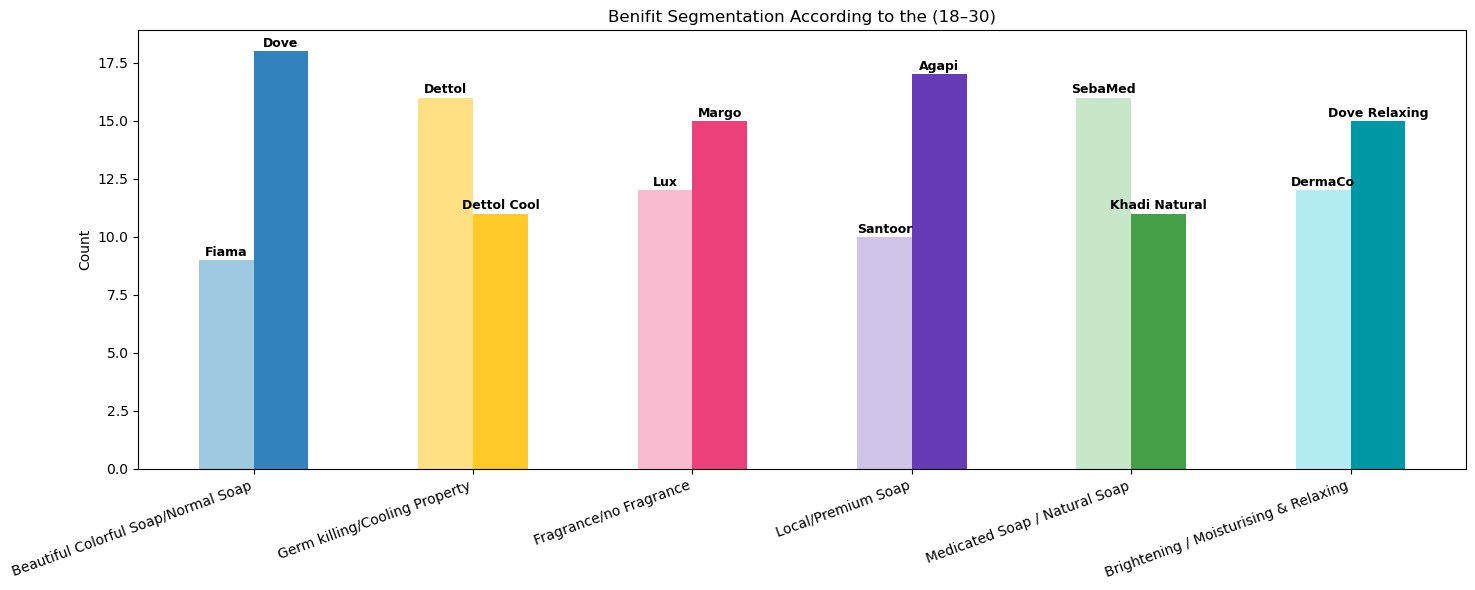

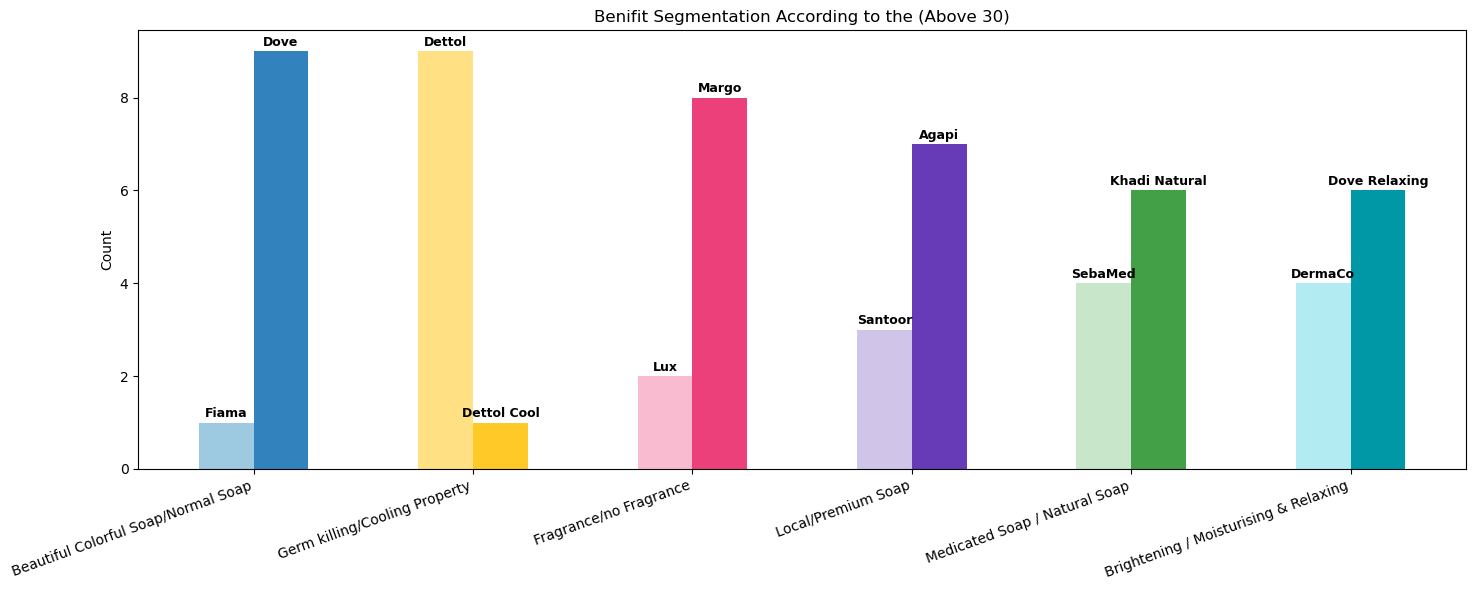

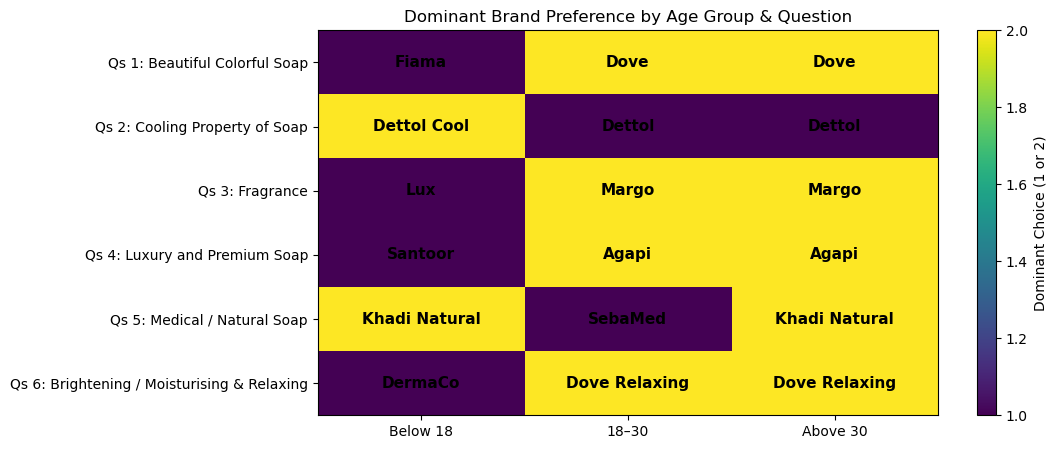

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# =========================
# LOAD DATA
# =========================
FILE_PATH = r"C:\Users\Lenovo\Desktop\All in one\Python Course\Data Handling\Survey- Female Soap - Form Responses 1.csv"
df = pd.read_csv(FILE_PATH)

# =========================
# AGE GROUPING
# =========================
def age_group(age):
    if age < 18:
        return "Below 18"
    elif 18 <= age <= 30:
        return "18–30"
    else:
        return "Above 30"

df["Age Group"] = df["Your Age?"].apply(age_group)

# =========================
# QUESTION & CATEGORY MAPPING
# =========================
questions = {
    "1. Which one you will Choose?": {
        "title": "Qs 1: Beautiful Colorful Soap",
        1: "Fiama",
        2: "Dove"
    },
    "2. Which one you will Choose?": {
        "title": "Qs 2: Cooling Property of Soap",
        1: "Dettol",
        2: "Dettol Cool"
    },
    "3. Which one you will Choose?": {
        "title": "Qs 3: Fragrance",
        1: "Lux",
        2: "Margo"
    },
    "4. Which one you will Choose? The benefits of Turmeric In First Soap, or Turmeric Benefits from the 2nd one Himalayan Handmade Soap?": {
        "title": "Qs 4: Luxury and Premium Soap",
        1: "Santoor",
        2: "Agapi"
    },
    "5. Which one you will Choose?": {
        "title": "Qs 5: Medical / Natural Soap",
        1: "SebaMed",
        2: "Khadi Natural"
    },
    "6. Which one you will Choose?": {
        "title": "Qs 6: Brightening / Moisturising & Relaxing",
        1: "DermaCo",
        2: "Dove Relaxing"
    }
}

age_colors = {
    "Below 18": "#1f77b4",
    "18–30": "#ff7f0e",
    "Above 30": "#2ca02c"
}

# =========================
# PART I
# RESPONSES BY AGE GROUP
# =========================
age_counts = df["Age Group"].value_counts().reindex(["Below 18", "18–30", "Above 30"])

plt.figure(figsize=(6,4))
plt.bar(age_counts.index, age_counts.values, color=age_colors.values())
plt.title("Responses by Age Group")
plt.ylabel("Number of Responses")
plt.show()

# =========================
# PART II
# AGE vs COUNT (BAR BANDS) – PER QUESTION & CATEGORY
# =========================
for q, info in questions.items():
    for cat in [1, 2]:
        subset = df[df[q] == cat]

        plt.figure(figsize=(9,4))

        for group in ["Below 18", "18–30", "Above 30"]:
            ages = subset[subset["Age Group"] == group]["Your Age?"]
            age_counts = ages.value_counts().sort_index()
            plt.bar(age_counts.index, age_counts.values,
                    color=age_colors[group],
                    label=group,
                    alpha=0.9)

        plt.xlabel("Age")
        plt.ylabel("Count")
        plt.title(f"{info['title']} – {info[cat]}")
        plt.legend()
        plt.show()
# =========================
# PART III- Benifit Segmentation
# =========================

question_display = [
    "Beautiful Colorful Soap/Normal Soap",
    "Germ killing/Cooling Property",
    "Fragrance/no Fragrance",
    "Local/Premium Soap",
    "Medicated Soap / Natural Soap",
    "Brightening / Moisturising & Relaxing"
]

# Light shade = Category 1, Dark shade = Category 2
question_colors = [
    ("#9ecae1", "#3182bd"),  # Blue
    ("#ffe082", "#ffca28"),  # Yellow
    ("#f8bbd0", "#ec407a"),  # Pink
    ("#d1c4e9", "#673ab7"),  # Purple
    ("#c8e6c9", "#43a047"),  # Green
    ("#b2ebf2", "#0097a7")   # Cyan
]

for group in ["Below 18", "18–30", "Above 30"]:
    group_df = df[df["Age Group"] == group]

    x = np.arange(len(question_display))
    width = 0.25

    cat1_counts = []
    cat2_counts = []
    brand1_names = []
    brand2_names = []

    for q, info in questions.items():
        counts = group_df[q].value_counts()
        cat1_counts.append(counts.get(1, 0))
        cat2_counts.append(counts.get(2, 0))
        brand1_names.append(info[1])
        brand2_names.append(info[2])

    plt.figure(figsize=(15,6))

    for i in range(len(question_display)):
        bar1 = plt.bar(
            x[i] - width/2,
            cat1_counts[i],
            width,
            color=question_colors[i][0]
        )
        bar2 = plt.bar(
            x[i] + width/2,
            cat2_counts[i],
            width,
            color=question_colors[i][1]
        )

        # --- Brand name labels on bars ---
        plt.text(
            x[i] - width/2,
            cat1_counts[i] + 0.05,
            brand1_names[i],
            ha="center",
            va="bottom",
            fontsize=9,
            fontweight="bold"
        )
        plt.text(
            x[i] + width/2,
            cat2_counts[i] + 0.05,
            brand2_names[i],
            ha="center",
            va="bottom",
            fontsize=9,
            fontweight="bold"
        )

    plt.xticks(x, question_display, rotation=20, ha="right")
    plt.ylabel("Count")
    plt.title(f"Benifit Segmentation According to the ({group})")

    plt.tight_layout()
    plt.show()


# =========================
# PART IV
# BIG, READABLE HEATMAP WITH BRAND NAMES
# =========================
heatmap_labels = []
heatmap_numeric = []

for q, info in questions.items():
    label_row = []
    numeric_row = []
    for group in ["Below 18", "18–30", "Above 30"]:
        dominant = df[df["Age Group"] == group][q].value_counts().idxmax()
        label_row.append(info[dominant])
        numeric_row.append(dominant)
    heatmap_labels.append(label_row)
    heatmap_numeric.append(numeric_row)

heatmap_numeric = np.array(heatmap_numeric)

plt.figure(figsize=(10,5))
plt.imshow(heatmap_numeric, aspect="auto")

for i in range(len(questions)):
    for j in range(3):
        plt.text(j, i, heatmap_labels[i][j],
                 ha="center", va="center",
                 fontsize=11, fontweight="bold")

plt.xticks(range(3), ["Below 18", "18–30", "Above 30"])
plt.yticks(range(len(questions)), [v["title"] for v in questions.values()])
plt.colorbar(label="Dominant Choice (1 or 2)")
plt.title("Dominant Brand Preference by Age Group & Question")
plt.show()
